In [1]:
import numpy as np
import torch 
import gym 

/opt/conda/envs/DQN_train/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
from preprocessing_wrappers import make_atari, wrap_deepmind, ImageToPyTorch

In [6]:
env = gym.make('PongNoFrameskip-v4')
env.observation_space

A.L.E: Arcade Learning Environment (version 0.7.5+db37282)
[Powered by Stella]
/opt/conda/envs/DQN_train/lib/python3.8/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/opt/conda/envs/DQN_train/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Box(0, 255, (210, 160, 3), uint8)

In [7]:
env_mapper = {'Pong':'PongNoFrameskip-v4',
               'Breakout': 'BreakoutNoFrameskip-v4',
               'Atlantis':'AtlantisNoFrameskip-v4'}


In [8]:
obs = env.reset()

In [9]:
np.array(obs).shape

(210, 160, 3)

In [10]:
wrapped_env = ImageToPyTorch(wrap_deepmind(make_atari(env_mapper['Pong'])))

In [11]:
wrapped_env.action_space

Discrete(6)

In [12]:
wrapped_env.observation_space

Box(0.0, 1.0, (4, 84, 84), float32)

In [13]:
obs = wrapped_env.reset()

/opt/conda/envs/DQN_train/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [14]:
wrapped_env.observation_space.shape

(4, 84, 84)

In [15]:
np_obs = np.array(obs)

In [16]:
np_obs.shape

(4, 84, 84)

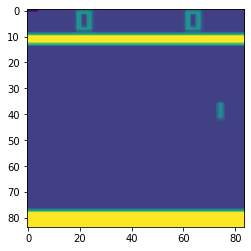

In [17]:
plt.imshow(np_obs[0,:,:])

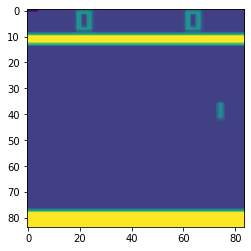

In [18]:
plt.imshow(np_obs[1,:,:])

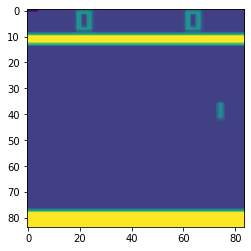

In [19]:
plt.imshow(np_obs[2,:,:])

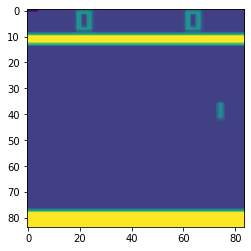

In [20]:
plt.imshow(np_obs[3,:,:,])

In [21]:
obs, reward, done, info = wrapped_env.step(0)

In [22]:
obs, reward, done, info = wrapped_env.step(1)

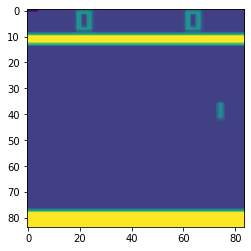

In [23]:
plt.imshow(np_obs[0,:,:])

In [24]:
obs.shape

(4, 84, 84)

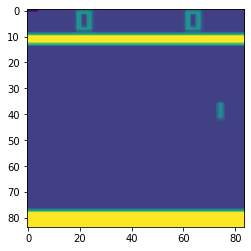

In [25]:
plt.imshow(np_obs[0,:,:])

In [26]:
obs, reward, done, info = wrapped_env.step(3)

In [27]:
np_obs = np.array(obs)

In [28]:
np_obs.shape

(4, 84, 84)

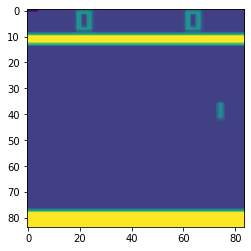

In [29]:
plt.imshow(np_obs[0,:,:])

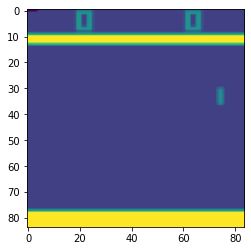

In [30]:
plt.imshow(np_obs[1,:,:])

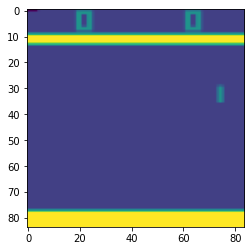

In [31]:
plt.imshow(np_obs[2,:,:])

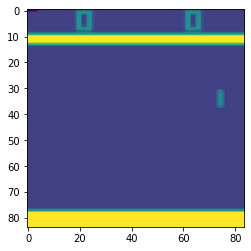

In [32]:
plt.imshow(np_obs[3,:,:])

In [33]:
np.random.rand(1)[0]

0.3800439052996638

In [34]:
np.random.rand(1)

array([0.15262044])

In [35]:
x = np.array([1,2,3,4,5])
y = np.array([1000,989,979,400,800])

In [36]:
from train_utils import LinearSchedule

epsilon_schedule = LinearSchedule(1e6,1,0.1)

In [37]:
timestep_inputs = list(range(1,int(1e6)))
epsilon_vals_out = []


In [38]:
for t in timestep_inputs:
    eps_out = epsilon_schedule.get_epsilon(t)
    epsilon_vals_out.append(eps_out)

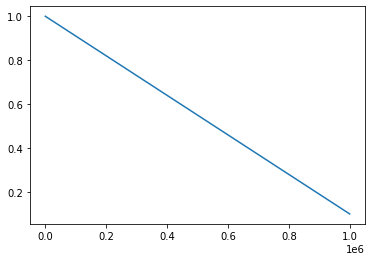

In [39]:
plt.plot(epsilon_vals_out)

In [40]:
capacity = 1000
state_dims = (4,84,84)

storage_size = (capacity,*state_dims)

In [41]:
storage_size

(1000, 4, 84, 84)

In [42]:
from train_utils import ReplayMemory

In [43]:
env.action_space.sample()

2

In [44]:
replay_memory = ReplayMemory(10000,env.observation_space.shape)

def populate_replay_memory(env,replay_memory,replay_start_size):
    state = env.reset()
    for i in range(replay_start_size):
        action = env.action_space.sample()
        next_state, reward, done, info = env.step(action)

        replay_memory.store(state,action,reward, next_state, done)

        if done: 
            state = env.reset()
        else:
            state = next_state 
        
        

In [45]:
rep_mem = ReplayMemory(20000,env.observation_space.shape)

populate_replay_memory(env,rep_mem,5000) 

In [46]:
state, action, reward, next_state, done = rep_mem.sample(32)

In [47]:
print('state.shape=',state.shape)
print('action.shape=', action.shape)
print('reward.shape=',reward.shape)
print('next_state.shape=',next_state.shape)
print('done.shape=',done.shape)

state.shape= torch.Size([32, 210, 160, 3])
action.shape= torch.Size([32])
reward.shape= torch.Size([32])
next_state.shape= torch.Size([32, 210, 160, 3])
done.shape= torch.Size([32])
